<p style="text-align: center;">
    Министерство науки и высшего образования Российской Федерации<br>
    Федеральное государственное автономное образовательное учреждение высшего образования «Национальный исследовательский Нижегородский государственный университет им. Н.И. Лобачевского»<br>
    <br>
    Институт Информационных технологий, математики и механики<br>
    <br><br><br>
    Отчет по учебной практике<br>
    <h1 style="text-align: center;">Исследование сигнала ЭКГ с целью выявления сердечно-сосудистых заболеваний посредством нейросетей</h1>
</p>
<br><br><br><br><br>
<p style = "text-align: left; margin-left: 80%;">
    Выполнил:<br>
    студент гр. 381803-1<br>
    <p style = "text-align: left; margin-left: 90%;">
        Мешалкин Н.А.
    </p>
</p>
<br><br><br>
<p style = "text-align: left; margin-left: 80%;">
    Проверил:<br>
    директор ИИТММ, заведующий кафедрой АГДМ<br>
    <p style = "text-align: left; margin-left: 90%;">
        Золотых Ю.Н.
    </p>
</p>
<br><br><br><br>
<p style="text-align: center">
    Нижний Новгород<br>
    2021
</p>

# Введение

**Описание работы:**  
Работа осуществляется с недавно открытой (2019г.) исследовательской базой данных под эгидой Chapman University и Shaoxing People's Hospital для сигналов электрокардиограмм в 12 отведениях. База данных направлена на исследования аритмии и других сердечно-сосудистых заболеваний. Некоторые виды аритмий, такие как мерцательная аритмия, оказывают выраженное негативное влияние на здоровье населения и качество жизни в целом. Так как в современном мире работа осуществляется с большим объемом данных, не всегда исследование "вручную" врачами-кардиологами возможно. Современные инструменты машинного обучения и статистики могут помочь врачам в исследовании. В связи с этим, работа направлена на исследование базы данных, содержащую ЭКГ в 12 отведениях 10 646 пациентов с частотой дискретизации 500 Гц, которая включает 11 распространенных ритмов и 67 дополнительных сердечно-сосудистых заболеваний, все помечены профессиональными экспертами. Набор данных состоит из 10-секундных 12-мерных наборов ЭКГ и соответсвующих меток для каждого объекта.

**Цель работы:**  
Необходимо "обработать" голый сигнал, измеренный в 12 отведениях с частотой дискретизации 500 Гц для 10646 пациентов. Под словом "обработать" стоит иметь ввиду применение сегментируюшей нейросети к нашему сигналу. После получения меток для каждого образца, измерить интересующие нас характеристики (метрики). Далее следует проверить метрики, которые были получены уже на размеченных данных из базы данных. Сравнить результаты.

Данная работа состоит из двух частей:  
1) Работа с размеченными данными, проверка характеристик.  
2) Работа с голым сигналом, применение к голому сигналу сегментирующей нейросети ННГУ,получение размеченных данных, проверка результатов.

## Часть 1:

Рассмотрим размеченную базу данных, содержащую ЭКГ в 12 отведениях 10 646 пациентов с частотой дискретизации 500 Гц, которая включает 11 общих ритмов и 67 дополнительных сердечно-сосудистых заболеваний.

Признаки датасета, их свойства и пояснения приведены в таблице №1.

                                                            Таблица №1.

*Attributes* | *Type* | *Value Range* | *Description* | 
--- | --- | --- | --- |
FileName | String |  | ECG data file name |
Rhythm | String |  | Rhythm Label |
Beat | String |  | Other conditions Label |
PatientAge | Numeric | 0-999 | Age |
Gender | String | MALE/FEMALE | Gender |
VentricularRate | Numeric | 0-999 | Ventricular rate in BPM |
AtrialRate | Numeric | 0-999 | Atrial rate in BPM |
QRSDuration | Numeric | 0-999 | QRS duration in BPM |
QTInterval | Numeric | 0-999 | QT interval in msec |
QTTCorrected | Numeric | 0-999 | Corrected QT interval in msec | 
RAxis | Numeric | -179~180 | R axis |
TAxis | Numeric | -179~181 | T axis |
QRSCount | Numeric | 0-254 | QRS count |
QOnset | Numeric | 16 Bit Unsigned | Q onset |
QOffset | Numeric | 17 Bit Unsigned | Q offset |
TOffset | Numeric | 18 Bit Unsigned | T offset |

Именно такие признаки были получены в ходе извлечения признаков у разработчиков базы данных. К основным признакам добавили возраст и пол из-за их важности почти во всех анализах медицинских данных. Характеристики, извлеченные II-го отведения, включают частоту желудочков в ударах в минуту (VentricularRate), предсердную частоту в ударах в минуту (AtrialRate), продолжительность QRS в миллисекундах (QRSDuration), интервал QT в миллисекундах (QTInterval), ось R (RAxis), ось T (TAxis), количество QRS (QRSCount), начало Q (QOnset), смещение Q (QOffset), среднее значение интервала RR, дисперсия интервала RR, количество интервалов RR.

Таким образом, наш датасет состоит из 10646 объектов/сэмплов (пациенты), у которых признаками являются признаки, полученные в результате исследования голого сигнала ЭКГ (признаки приведены в таблице №1). Нам необходимо будет предсказывать посредством алгоритмов машинного обучения признак Rhytnm, который отображает нарушение сердечного ритма у данного пациента.

Прочитаем данные:

In [2]:
import sklearn
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv("data/Diagnostics.csv",delimiter=';',index_col='FileName')
data

,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
FileName,,,,,,,,,,,,,,,
MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378


Нас интересует столбец "Rhythm". Рассмотрим его значения подробнее.

In [4]:
data["Rhythm"].value_counts()

SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64

Видим, что присутствует дисбаланс классов. Чтобы углубиться в проблему, рассмтотрим наши метки и разберемся, что они из себя представляют.  
Классы нашего датасета представлены в таблице №2.


                                                           Таблица №2.

*Acronym Name* | *Full Name* | *Frequency,n(%)* |
--- | --- | --- | 
SB | Sinus Bradycardia | 3.88(36.53) |
SR | Sinus Rhythm | 1.82(17.15) |
Beat | Atrial Fibrillation | 1.7(16.72) | 
PatientAge | Sinus Tachycardia | 1.5(14.73) |
Gender | Atrial Flutter | 445 (4.18) |
VentricularRate | Sinus Irregularity | 399 (3.75) |
AtrialRate | Supraventricular Tachycardia | 587 (5.51) |
QRSDuration | Atrial Tachycardia | 121 (1.14) |
QTInterval | Atrioventicular Node Reentrant Tachycardia | 16 (0.15) | 
QTTCorrected | Atrioventicular Reentrant Tachycardia | 8 (0.07) |
RAxis | Sinus Atrium to Atrial Wandering Rhythm | 7 (0.07) |
All | All | 10.646 (100) |


Поскольку некоторые ритмы имеют крайне мало образцов, по предложению кардиологов следует объединить несколько редких случаев в типы аритмий верхнего уровня.   
Таким образом, 11 ритмов были объединены в 4 группы (SB, AFIB, GSVT, SR), представленные в таблице 3.

**SB включает:**  
1) Синусовую брадикардию (sinus bradycardia (SB))

**AFIB состоит:**  
1) Фибрилляции предсердий (atrial fibrillation (AFIB)),  
2) Трепетания предсердий (and atrial flutter (AF))  
  
**GSVT содержит:**  
1) Наджелудочковая тахикардия (supraventricular tachycardia (SVT)),  
2) Предсердная тахикардия( atrial tachycardia (AT)),  
3) Атриовентрикулярная возвратная тахикардия в узле(atrioventricular node reentrant tachycardia (AVNRT)),  
4) Возвратная атриовентрикулярная тахикардия(atrioventricular reentrant tachycardia (AVRT)),  
5) Синусовое предсердие с блуждающим ритмом предсердий(sinus atrium to atrial wandering rhythm (SAAWR)),  
6) Синусовая тахикардия (sinus Tachycardia (ST))
  
**SR включает:**  
1) Синусовый ритм (sinus rhythm (SR))  
2) Нерегулярность синусового узла (sinus irregularity (SI))

                                                  Таблица №3. Итоговые классы.

*Merged from* | *Merged to* | *Total* |
--- | --- | --- | 
AFIB,AF | AFIB | 3,889 |
SVT,AT,SAAWR,ST,AVNRT,AVRT | GSVT | 2,307 |
SB | SB | 2,225 | 
SR,SI | SR | 2,225 |
All | All | 10,646 |



Объединим классы:

In [5]:
for i in range(0,len(data["Rhythm"])):
    if data['Rhythm'][i]=='AFIB' or data['Rhythm'][i]=='AF':
        data['Rhythm'][i]='AFIB'
    if data['Rhythm'][i]=='SVT' or data['Rhythm'][i]=='AT' or data['Rhythm'][i]=='AVNRT' or data['Rhythm'][i]=='AVRT'  or data['Rhythm'][i]=='ST' or data['Rhythm'][i]=='SAAWR':
        data['Rhythm'][i]='GSVT'
    if data['Rhythm'][i]=='SR' or data['Rhythm'][i]=='SA':
        data['Rhythm'][i]='SR'

In [6]:
data['Rhythm'].value_counts()

SB      3889
GSVT    2307
AFIB    2225
SR      2225
Name: Rhythm, dtype: int64

### Работа с данными:

##### Проверка коррелирующих признаков

In [7]:
corr_mat = data.corr()
corr_mat

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
PatientAge,1.000000,0.032784,0.123134,0.095891,0.095131,0.240466,-0.253646,0.083759,0.031308,0.018093,0.114092,0.098501
VentricularRate,0.032784,1.000000,0.533340,-0.054847,-0.853169,0.421672,0.091437,0.104201,0.997072,0.011266,-0.048688,-0.846037
AtrialRate,0.123134,0.533340,1.000000,-0.060148,-0.474084,0.252017,0.051855,0.050377,0.530587,0.037640,-0.034009,-0.463366
QRSDuration,0.095891,-0.054847,-0.060148,1.000000,0.196121,0.188760,-0.084620,0.009285,-0.053868,-0.424377,0.719834,0.103680
QTInterval,0.095131,-0.853169,-0.474084,0.196121,1.000000,0.025108,-0.123269,-0.056627,-0.850519,-0.082541,0.141702,0.976715
QTCorrected,0.240466,0.421672,0.252017,0.188760,0.025108,1.000000,-0.048156,0.071952,0.420488,-0.125955,0.100727,-0.002145
RAxis,-0.253646,0.091437,0.051855,-0.084620,-0.123269,-0.048156,1.000000,0.046593,0.090857,0.061945,-0.040955,-0.109254
TAxis,0.083759,0.104201,0.050377,0.009285,-0.056627,0.071952,0.046593,1.000000,0.103753,-0.075576,-0.048233,-0.072584
QRSCount,0.031308,0.997072,0.530587,-0.053868,-0.850519,0.420488,0.090857,0.103753,1.000000,0.010224,-0.048463,-0.843626
QOnset,0.018093,0.011266,0.037640,-0.424377,-0.082541,-0.125955,0.061945,-0.075576,0.010224,1.000000,0.323058,0.133192


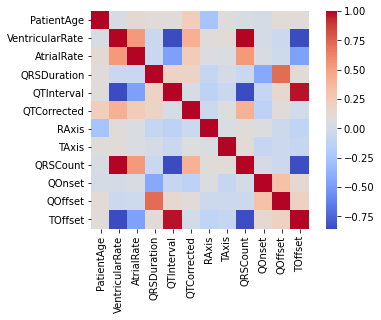

In [8]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Из матрицы корреляции четко видно что, есть некоторое количество коррелирующих между собой признаков. Рассмотрим их подробнее.

In [9]:
corr_mat.where(np.triu(corr_mat > 0.75, k=1)).stack().sort_values(ascending=False)

VentricularRate  QRSCount    0.997072
QTInterval       TOffset     0.976715
dtype: float64

Удалим коррелирующие признаки из нашего датасета.

In [10]:
data=data.drop(['TOffset'], axis = 1)
data=data.drop(['QRSCount'], axis = 1)

corr_mat = data.corr()
corr_mat.where(np.triu(corr_mat > 0.75, k=1)).stack().sort_values(ascending=False)


Series([], dtype: float64)

#####  Приведение данных к одному типу

In [11]:
data_notNull = data.drop(['Beat'], axis=1) #Удаление столбца Beat, из-за большого числа пропущенных значений
data_notNull

,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QOnset,QOffset
FileName,,,,,,,,,,,,
MUSE_20180113_171327_27000,AFIB,85,MALE,117,234,114,356,496,81,-27,208,265
MUSE_20180112_073319_29000,SB,59,FEMALE,52,52,92,432,401,76,42,215,261
MUSE_20180111_165520_97000,SR,20,FEMALE,67,67,82,382,403,88,20,224,265
MUSE_20180113_121940_44000,SB,66,MALE,53,53,96,456,427,34,3,219,267
MUSE_20180112_122850_57000,AFIB,73,FEMALE,162,162,114,252,413,68,-40,228,285
...,...,...,...,...,...,...,...,...,...,...,...,...
MUSE_20181222_204306_99000,GSVT,80,FEMALE,196,73,168,284,513,258,244,177,261
MUSE_20181222_204309_22000,GSVT,81,FEMALE,162,81,162,294,482,110,-75,173,254
MUSE_20181222_204310_31000,GSVT,39,MALE,152,92,152,340,540,250,38,208,284


Воспользуемся функцией Label Encoder. Данная функция маркирует признаки с нечисловыми типами данных и приводит их к числовым.

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(data['Gender'])
data_notNull['Gender']=le.transform(data_notNull['Gender'])
le.fit(data_notNull['Rhythm'])
data_notNull['Rhythm']=le.transform(data_notNull['Rhythm'])
data_notNull=pd.get_dummies(data_notNull, columns=["Gender"])

In [13]:
data_notNull

,Rhythm,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QOnset,QOffset,Gender_0,Gender_1
FileName,,,,,,,,,,,,,
MUSE_20180113_171327_27000,0,85,117,234,114,356,496,81,-27,208,265,0,1
MUSE_20180112_073319_29000,2,59,52,52,92,432,401,76,42,215,261,1,0
MUSE_20180111_165520_97000,3,20,67,67,82,382,403,88,20,224,265,1,0
MUSE_20180113_121940_44000,2,66,53,53,96,456,427,34,3,219,267,0,1
MUSE_20180112_122850_57000,0,73,162,162,114,252,413,68,-40,228,285,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUSE_20181222_204306_99000,1,80,196,73,168,284,513,258,244,177,261,1,0
MUSE_20181222_204309_22000,1,81,162,81,162,294,482,110,-75,173,254,1,0
MUSE_20181222_204310_31000,1,39,152,92,152,340,540,250,38,208,284,0,1


##### Проверка выбросов 


Проверим наиболее для нас важные признаки и удалим те объекты из нашего датасета, которые выходят за интервал квантиля (0.005;0.995)

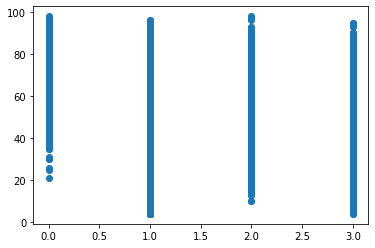

In [14]:
plt.scatter(data_notNull['Rhythm'],data_notNull['PatientAge'])
pass

In [15]:
rows_to_drop = data_notNull[(data_notNull['PatientAge'] < data_notNull['PatientAge'].quantile(0.005)) |
                            (data_notNull['PatientAge'] > data_notNull['PatientAge'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10551, 13)

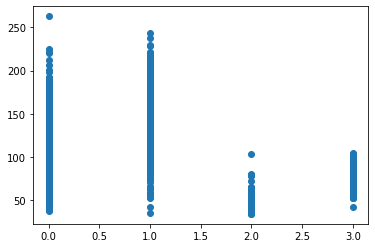

In [16]:
plt.scatter(data_notNull['Rhythm'],data_notNull['VentricularRate'])
pass

In [17]:
rows_to_drop = data_notNull[(data_notNull['VentricularRate'] < data_notNull['VentricularRate'].quantile(0.005)) |
                            (data_notNull['VentricularRate'] > data_notNull['VentricularRate'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10462, 13)

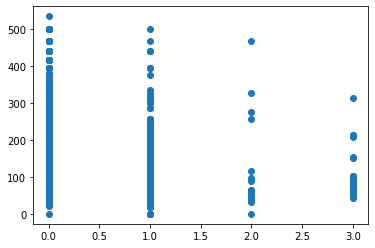

In [18]:
plt.scatter(data_notNull['Rhythm'],data_notNull['AtrialRate'])
pass

In [19]:
rows_to_drop = data_notNull[(data_notNull['AtrialRate'] < data_notNull['AtrialRate'].quantile(0.005)) |
                            (data_notNull['AtrialRate'] > data_notNull['AtrialRate'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10374, 13)

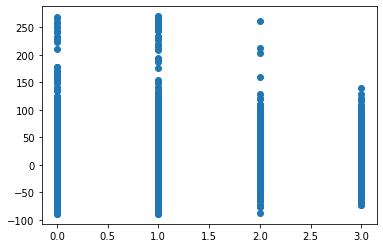

In [20]:
plt.scatter(data_notNull['Rhythm'],data_notNull['RAxis'])
pass

In [21]:
rows_to_drop = data_notNull[(data_notNull['RAxis'] < data_notNull['RAxis'].quantile(0.005)) |
                            (data_notNull['RAxis'] > data_notNull['RAxis'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10273, 13)

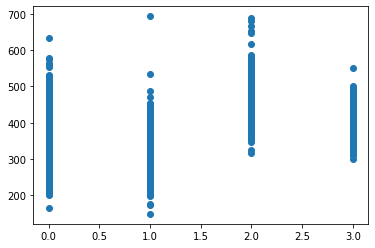

In [22]:
plt.scatter(data_notNull['Rhythm'],data_notNull['QTInterval'])
pass

In [23]:
rows_to_drop = data_notNull[(data_notNull['QTInterval'] < data_notNull['QTInterval'].quantile(0.005)) |
                            (data_notNull['QTInterval'] > data_notNull['QTInterval'].quantile(0.995))].index
data_notNull = data_notNull.drop(rows_to_drop)
data_notNull.shape 

(10173, 13)

### Разделение данных на тренировочную и тестовую выборки:

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
import imblearn

Выделем наш целевой столбец.

In [25]:
y=data_notNull['Rhythm']
data_notNull.pop('Rhythm')
X=data_notNull

In [26]:
y.value_counts()

2    3810
3    2198
1    2097
0    2068
Name: Rhythm, dtype: int64

Посмотрим на наши 4 итоговых класса. Видим, что есть небольшая несбалансированность классов (Но для частоты эксперимента не будем с ней бороться).

Проведем нормализацию данных.

In [27]:
from sklearn.preprocessing import scale
X_scaled=scale(X)
X_scaled

array([[ 1.47534442,  1.0756389 ,  2.60433182, ...,  0.0411852 ,
        -0.89383387,  0.89383387],
       [-0.00989983, -0.95031815, -0.69547157, ..., -0.45187399,
         1.11877613, -1.11877613],
       [-2.23776621, -0.4827896 , -0.42350975, ...,  0.0411852 ,
         1.11877613, -1.11877613],
       ...,
       [-1.32376975,  2.13537028,  1.09947643, ..., -0.3286092 ,
        -0.89383387,  0.89383387],
       [ 1.2468453 ,  2.47822455, -0.16967872, ..., -1.31472759,
         1.11877613, -1.11877613],
       [ 0.96122141,  2.88341596,  1.5890077 , ...,  0.5342444 ,
        -0.89383387,  0.89383387]])

Разделим данные на тестовую (25%) и тренировочную выборки (75%).

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25,stratify=y, random_state=42)
#мое

In [29]:
X_train.shape

(7629, 12)

In [30]:
y_train.value_counts()

2    2857
3    1648
1    1573
0    1551
Name: Rhythm, dtype: int64

#### Тренировка и оценка модели.

В качестве метрик рассмотрим f1score и confusion matrix. В данных условиях они являются более репрезетативными.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#### SVC

In [32]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [33]:
y_pred=clf.predict(X_test)

print("recall test: ",recall_score(y_test.values, y_pred,average='macro'))
print("presion test: ",precision_score(y_test.values,y_pred ,average='macro'))
print("f1_score test: ",f1_score(y_test.values, y_pred,average='macro'))

recall test:  0.8342013626368103
presion test:  0.8403142803967811
f1_score test:  0.834496180480217


In [34]:
confusion_matrix(y_test.values, y_pred)
conf_mx = confusion_matrix(y_test.values, y_pred) #посылаем предсказанные значения и истинные
conf_mx

array([[317, 110,  25,  65],
       [ 62, 456,   0,   6],
       [  5,   0, 945,   3],
       [ 30,  11,  35, 474]], dtype=int64)

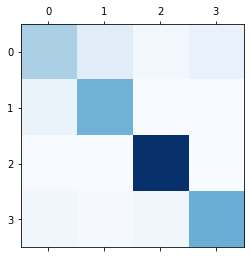

In [35]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) 
plt.show() 

#### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
clf = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=3, random_state=42)

clf.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred=clf.predict(X_test)

print("recall test: ",recall_score(y_test.values, y_pred,average='macro'))
print("presion test: ",precision_score(y_test.values,y_pred ,average='macro'))
print("f1_score test: ",f1_score(y_test.values, y_pred,average='macro'))

recall test:  0.786290505439629
presion test:  0.8021542872222893
f1_score test:  0.7902168584936935


In [38]:
confusion_matrix(y_test.values, y_pred)
conf_mx = confusion_matrix(y_test.values, y_pred) 
conf_mx

array([[308, 116,  40,  53],
       [ 73, 444,   0,   7],
       [  8,   0, 929,  16],
       [ 32,  19,  99, 400]], dtype=int64)

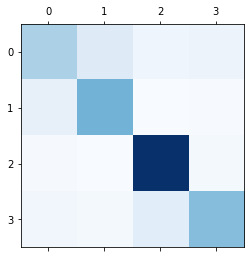

In [39]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) 
plt.show() 

#### RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred=clf.predict(X_test)

print("recall test: ",recall_score(y_test.values, y_pred,average='macro'))
print("presion test: ",precision_score(y_test.values,y_pred ,average='macro'))
print("f1_score test: ",f1_score(y_test.values, y_pred,average='macro'))

recall test:  0.8866923718085467
presion test:  0.88764121416068
f1_score test:  0.8863623177195867


In [42]:
confusion_matrix(y_test.values, y_pred)
conf_mx = confusion_matrix(y_test.values, y_pred) 
conf_mx

array([[377,  73,  12,  55],
       [ 51, 466,   0,   7],
       [  5,   0, 947,   1],
       [ 29,   2,   5, 514]], dtype=int64)

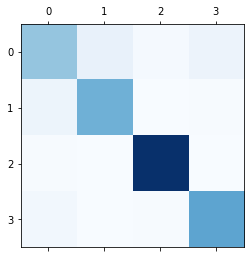

In [43]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) 
plt.show() 

#### GradientBoostingClassifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [45]:
y_pred=clf.predict(X_test)

print("recall test: ",recall_score(y_test.values, y_pred,average='macro'))
print("presion test: ",precision_score(y_test.values,y_pred ,average='macro'))
print("f1_score test: ",f1_score(y_test.values, y_pred,average='macro'))


recall test:  0.893104400984503
presion test:  0.8943229287437973
f1_score test:  0.8926508184495053


In [46]:
confusion_matrix(y_test.values, y_pred)
conf_mx = confusion_matrix(y_test.values, y_pred)
conf_mx

array([[381,  73,  12,  51],
       [ 54, 463,   0,   7],
       [  4,   0, 947,   2],
       [ 17,   2,   4, 527]], dtype=int64)

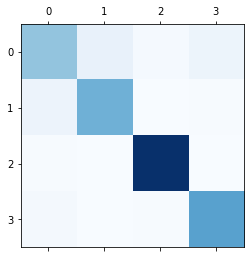

In [47]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) 
plt.show() 

#### Neural network

In [48]:
#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [49]:
X

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QOnset,QOffset,Gender_0,Gender_1
FileName,,,,,,,,,,,,
MUSE_20180113_171327_27000,85,117,234,114,356,496,81,-27,208,265,0,1
MUSE_20180112_073319_29000,59,52,52,92,432,401,76,42,215,261,1,0
MUSE_20180111_165520_97000,20,67,67,82,382,403,88,20,224,265,1,0
MUSE_20180113_121940_44000,66,53,53,96,456,427,34,3,219,267,0,1
MUSE_20180112_122850_57000,73,162,162,114,252,413,68,-40,228,285,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
MUSE_20181222_204248_77000,23,181,159,74,252,437,69,-1,228,265,1,0
MUSE_20181222_204249_88000,69,178,170,122,308,530,57,225,203,264,0,1
MUSE_20181222_204303_61000,36,151,151,88,274,434,67,12,218,262,0,1


In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,)),
    keras.layers.Dense(300, activation=tf.nn.tanh),
    keras.layers.Dense(200, activation=tf.nn.tanh),
    keras.layers.Dense(80, activation=tf.nn.tanh),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               3900      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                16080     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 324       
Total params: 80,504
Trainable params: 80,504
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

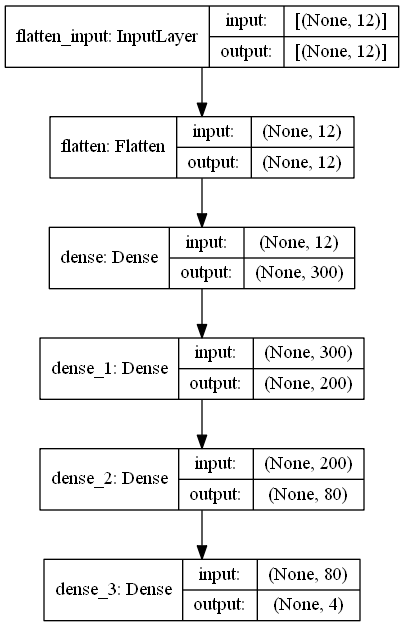

In [53]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [54]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
239/239 [==============================] - 1s 907us/step - loss: 0.5574 - accuracy: 0.7701
Epoch 2/20
239/239 [==============================] - 0s 925us/step - loss: 0.3804 - accuracy: 0.8478
Epoch 3/20
239/239 [==============================] - 0s 908us/step - loss: 0.3704 - accuracy: 0.8556
Epoch 4/20
239/239 [==============================] - 0s 950us/step - loss: 0.3415 - accuracy: 0.8613
Epoch 5/20
239/239 [==============================] - 0s 891us/step - loss: 0.3189 - accuracy: 0.8799
Epoch 6/20
239/239 [==============================] - 0s 988us/step - loss: 0.3186 - accuracy: 0.8788
Epoch 7/20
239/239 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8759
Epoch 8/20
239/239 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8821
Epoch 9/20
239/239 [==============================] - 0s 1ms/step - loss: 0.2672 - accuracy: 0.8984
Epoch 10/20
239/239 [==============================] - 0s 915us/step - loss: 0.2595 - ac

In [55]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

80/80 [==============================] - 0s 544us/step - loss: 0.2753 - accuracy: 0.9080
Test accuracy: 0.9080188870429993


Лучшим алгоритмом является нейронная сеть. Она показала лучшую точность ~92%.  
Таким образом мы провели исследование размеченных данных, которые нам были предоставлены базой данных Chapman University и Shaoxing People's Hospital. Теперь нам следует собственноручно провести исследование над голым сигналом и получить свои размеченные данные.

## Часть 2:

Рассмотрим сигналы электрокардиограммы в 12 отведениях (5000 образцов). Напомним, что для каждого испытуемого доступен сигнал длиной в 10 секунд. Общее количество испытуемых: 10646 человек.

Рассмотрим, случайно взятого пациента.

In [56]:
data = pd.read_csv("ECGData/MUSE_20180111_155115_19000.csv",delimiter=',')
data 

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-214.72,-229.36,-14.64,224.48,-102.48,-122.00,614.88,814.96,912.56,126.88,-239.12,-507.52
1,-200.08,-209.84,-9.76,204.96,-97.60,-112.24,605.12,819.84,927.20,165.92,-195.20,-463.60
2,-190.32,-195.20,-4.88,195.20,-92.72,-102.48,600.24,829.60,956.48,204.96,-151.28,-429.44
3,-165.92,-165.92,0.00,165.92,-82.96,-82.96,590.48,844.24,971.12,239.12,-117.12,-400.16
4,-161.04,-156.16,4.88,161.04,-82.96,-78.08,585.60,844.24,985.76,273.28,-78.08,-370.88
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-117.12,9.76,126.88,53.68,-122.00,68.32,439.20,634.40,800.32,278.16,0.00,-273.28
4996,-102.48,14.64,117.12,43.92,-112.24,63.44,424.56,634.40,819.84,297.68,24.40,-248.88
4997,-92.72,29.28,122.00,34.16,-107.36,73.20,424.56,644.16,829.60,312.32,43.92,-229.36
4998,-92.72,34.16,126.88,29.28,-112.24,78.08,424.56,644.16,829.60,312.32,58.56,-204.96


Напомню, что мы будем использовать нейронную сеть для сегментации сигналов на p, qrs и t сегменты. Результат сохраняется в виде формата json там же, где лежат сами сигналы.

In [59]:
import json
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
import wfdb

sample_rate = 500
path_to_model = "Segmentation/"
path_to_data = "data/"

class Delineation:
    def __init__(self):
        self._model = torch.jit.load(path_to_model + "model.pt")
        self._max_dist = int(0.03 * sample_rate)
        self._border = int(0.8 * sample_rate)
        
    def _remove_small(self, signal):
        last_zero = 0
        for i in range(len(signal)):
            if signal[i] == 0:
                if i - last_zero < self._max_dist:
                    signal[last_zero:i] = 0
                last_zero = i

    def _merge_small(self, signal):
        lasts = np.full(signal.max() + 1, -(self._max_dist+1))
        for i in range(len(signal)):
            m = signal[i]
            if i - lasts[m] < self._max_dist and m > 0:
                signal[lasts[m]:i] = m
            lasts[m] = i

    def _mask_to_delineation(self, data):
        masks = np.argmax(data, 1)
        delineation = []
        v_to_del = {0:'none', 1:'p', 2:'qrs', 3:'t'}
        for rec in masks:
            self._merge_small(rec)
            self._remove_small(rec)
            rec_del = []
            i = 0
            rec_len = len(rec)
            while i < rec_len:
                v = rec[i]
                if v > 0:
                    rec_del.append({
                        "begin": i,
                        "end": 0,
                        "type": v_to_del[v]
                    })
                    while i < rec_len and rec[i] == v:
                        rec_del[-1]["end"] = i
                        i += 1
                    t = rec_del[-1]
                    if t["begin"] < self._border or t["end"] > rec_len - self._border:
                        rec_del.pop()
                i += 1
            d_res = []
            for c, n in zip(rec_del[:-1], rec_del[1:]):
                d_res.append(c)
                d_res.append({
                    "begin": c["end"],
                    "end": n["begin"],
                    "type": "none"
                })
            if rec_del:
                begin = {
                    "begin": 0,
                    "end": rec_del[0]["begin"],
                    "type": "none"
                }
                end = {
                    "begin": rec_del[-1]["end"],
                    "end": rec_len,
                    "type": "none"
                }
                d_res = [begin] + d_res + [rec_del[-1], end]
            else:
                d_res.append({
                    "begin": 0,
                    "end": rec_len,
                    "type": "none"
                })
            delineation.append(d_res)
        return delineation

    def __call__(self, signal):
        signal = torch.FloatTensor(np.expand_dims(signal, axis=1))
        masks = self._model(signal).data.numpy()
        return self._mask_to_delineation(masks)

def main():
    database_info = pd.read_csv(path_to_data+"Diagnostics.csv",delimiter=';')
    delineation = Delineation()
    i = 0
    for f in database_info['FileName']:
        signal = pd.read_csv("ECGDataDenoised/"+f+'.csv',delimiter=',')
        data = np.array(signal)
        data_transp = np.transpose(data)
        result = delineation(data_transp)
        with open(path_to_data + f + ".json", "w") as write_file:
            json.dump(result, write_file)
        print(i, " record passed")
        i+=1

if __name__ == "__main__":
    main()

0  record passed
1  record passed
2  record passed
3  record passed
4  record passed
5  record passed
6  record passed
7  record passed
8  record passed
9  record passed
10  record passed
11  record passed
12  record passed
13  record passed
14  record passed
15  record passed
16  record passed
17  record passed
18  record passed
19  record passed
20  record passed
21  record passed
22  record passed
23  record passed
24  record passed
25  record passed
26  record passed
27  record passed
28  record passed
29  record passed
30  record passed
31  record passed
32  record passed
33  record passed
34  record passed
35  record passed
36  record passed
37  record passed
38  record passed
39  record passed
40  record passed
41  record passed
42  record passed
43  record passed
44  record passed
45  record passed
46  record passed
47  record passed
48  record passed
49  record passed
50  record passed
51  record passed
52  record passed
53  record passed
54  record passed
55  record passed
56

437  record passed
438  record passed
439  record passed
440  record passed
441  record passed
442  record passed
443  record passed
444  record passed
445  record passed
446  record passed
447  record passed
448  record passed
449  record passed
450  record passed
451  record passed
452  record passed
453  record passed
454  record passed
455  record passed
456  record passed
457  record passed
458  record passed
459  record passed
460  record passed
461  record passed
462  record passed
463  record passed
464  record passed
465  record passed
466  record passed
467  record passed
468  record passed
469  record passed
470  record passed
471  record passed
472  record passed
473  record passed
474  record passed
475  record passed
476  record passed
477  record passed
478  record passed
479  record passed
480  record passed
481  record passed
482  record passed
483  record passed
484  record passed
485  record passed
486  record passed
487  record passed
488  record passed
489  record 

869  record passed
870  record passed
871  record passed
872  record passed
873  record passed
874  record passed
875  record passed
876  record passed
877  record passed
878  record passed
879  record passed
880  record passed
881  record passed
882  record passed
883  record passed
884  record passed
885  record passed
886  record passed
887  record passed
888  record passed
889  record passed
890  record passed
891  record passed
892  record passed
893  record passed
894  record passed
895  record passed
896  record passed
897  record passed
898  record passed
899  record passed
900  record passed
901  record passed
902  record passed
903  record passed
904  record passed
905  record passed
906  record passed
907  record passed
908  record passed
909  record passed
910  record passed
911  record passed
912  record passed
913  record passed
914  record passed
915  record passed
916  record passed
917  record passed
918  record passed
919  record passed
920  record passed
921  record 

1286  record passed
1287  record passed
1288  record passed
1289  record passed
1290  record passed
1291  record passed
1292  record passed
1293  record passed
1294  record passed
1295  record passed
1296  record passed
1297  record passed
1298  record passed
1299  record passed
1300  record passed
1301  record passed
1302  record passed
1303  record passed
1304  record passed
1305  record passed
1306  record passed
1307  record passed
1308  record passed
1309  record passed
1310  record passed
1311  record passed
1312  record passed
1313  record passed
1314  record passed
1315  record passed
1316  record passed
1317  record passed
1318  record passed
1319  record passed
1320  record passed
1321  record passed
1322  record passed
1323  record passed
1324  record passed
1325  record passed
1326  record passed
1327  record passed
1328  record passed
1329  record passed
1330  record passed
1331  record passed
1332  record passed
1333  record passed
1334  record passed
1335  record passed


1696  record passed
1697  record passed
1698  record passed
1699  record passed
1700  record passed
1701  record passed
1702  record passed
1703  record passed
1704  record passed
1705  record passed
1706  record passed
1707  record passed
1708  record passed
1709  record passed
1710  record passed
1711  record passed
1712  record passed
1713  record passed
1714  record passed
1715  record passed
1716  record passed
1717  record passed
1718  record passed
1719  record passed
1720  record passed
1721  record passed
1722  record passed
1723  record passed
1724  record passed
1725  record passed
1726  record passed
1727  record passed
1728  record passed
1729  record passed
1730  record passed
1731  record passed
1732  record passed
1733  record passed
1734  record passed
1735  record passed
1736  record passed
1737  record passed
1738  record passed
1739  record passed
1740  record passed
1741  record passed
1742  record passed
1743  record passed
1744  record passed
1745  record passed


2106  record passed
2107  record passed
2108  record passed
2109  record passed
2110  record passed
2111  record passed
2112  record passed
2113  record passed
2114  record passed
2115  record passed
2116  record passed
2117  record passed
2118  record passed
2119  record passed
2120  record passed
2121  record passed
2122  record passed
2123  record passed
2124  record passed
2125  record passed
2126  record passed
2127  record passed
2128  record passed
2129  record passed
2130  record passed
2131  record passed
2132  record passed
2133  record passed
2134  record passed
2135  record passed
2136  record passed
2137  record passed
2138  record passed
2139  record passed
2140  record passed
2141  record passed
2142  record passed
2143  record passed
2144  record passed
2145  record passed
2146  record passed
2147  record passed
2148  record passed
2149  record passed
2150  record passed
2151  record passed
2152  record passed
2153  record passed
2154  record passed
2155  record passed


2516  record passed
2517  record passed
2518  record passed
2519  record passed
2520  record passed
2521  record passed
2522  record passed
2523  record passed
2524  record passed
2525  record passed
2526  record passed
2527  record passed
2528  record passed
2529  record passed
2530  record passed
2531  record passed
2532  record passed
2533  record passed
2534  record passed
2535  record passed
2536  record passed
2537  record passed
2538  record passed
2539  record passed
2540  record passed
2541  record passed
2542  record passed
2543  record passed
2544  record passed
2545  record passed
2546  record passed
2547  record passed
2548  record passed
2549  record passed
2550  record passed
2551  record passed
2552  record passed
2553  record passed
2554  record passed
2555  record passed
2556  record passed
2557  record passed
2558  record passed
2559  record passed
2560  record passed
2561  record passed
2562  record passed
2563  record passed
2564  record passed
2565  record passed


2926  record passed
2927  record passed
2928  record passed
2929  record passed
2930  record passed
2931  record passed
2932  record passed
2933  record passed
2934  record passed
2935  record passed
2936  record passed
2937  record passed
2938  record passed
2939  record passed
2940  record passed
2941  record passed
2942  record passed
2943  record passed
2944  record passed
2945  record passed
2946  record passed
2947  record passed
2948  record passed
2949  record passed
2950  record passed
2951  record passed
2952  record passed
2953  record passed
2954  record passed
2955  record passed
2956  record passed
2957  record passed
2958  record passed
2959  record passed
2960  record passed
2961  record passed
2962  record passed
2963  record passed
2964  record passed
2965  record passed
2966  record passed
2967  record passed
2968  record passed
2969  record passed
2970  record passed
2971  record passed
2972  record passed
2973  record passed
2974  record passed
2975  record passed


3336  record passed
3337  record passed
3338  record passed
3339  record passed
3340  record passed
3341  record passed
3342  record passed
3343  record passed
3344  record passed
3345  record passed
3346  record passed
3347  record passed
3348  record passed
3349  record passed
3350  record passed
3351  record passed
3352  record passed
3353  record passed
3354  record passed
3355  record passed
3356  record passed
3357  record passed
3358  record passed
3359  record passed
3360  record passed
3361  record passed
3362  record passed
3363  record passed
3364  record passed
3365  record passed
3366  record passed
3367  record passed
3368  record passed
3369  record passed
3370  record passed
3371  record passed
3372  record passed
3373  record passed
3374  record passed
3375  record passed
3376  record passed
3377  record passed
3378  record passed
3379  record passed
3380  record passed
3381  record passed
3382  record passed
3383  record passed
3384  record passed
3385  record passed


3746  record passed
3747  record passed
3748  record passed
3749  record passed
3750  record passed
3751  record passed
3752  record passed
3753  record passed
3754  record passed
3755  record passed
3756  record passed
3757  record passed
3758  record passed
3759  record passed
3760  record passed
3761  record passed
3762  record passed
3763  record passed
3764  record passed
3765  record passed
3766  record passed
3767  record passed
3768  record passed
3769  record passed
3770  record passed
3771  record passed
3772  record passed
3773  record passed
3774  record passed
3775  record passed
3776  record passed
3777  record passed
3778  record passed
3779  record passed
3780  record passed
3781  record passed
3782  record passed
3783  record passed
3784  record passed
3785  record passed
3786  record passed
3787  record passed
3788  record passed
3789  record passed
3790  record passed
3791  record passed
3792  record passed
3793  record passed
3794  record passed
3795  record passed


4156  record passed
4157  record passed
4158  record passed
4159  record passed
4160  record passed
4161  record passed
4162  record passed
4163  record passed
4164  record passed
4165  record passed
4166  record passed
4167  record passed
4168  record passed
4169  record passed
4170  record passed
4171  record passed
4172  record passed
4173  record passed
4174  record passed
4175  record passed
4176  record passed
4177  record passed
4178  record passed
4179  record passed
4180  record passed
4181  record passed
4182  record passed
4183  record passed
4184  record passed
4185  record passed
4186  record passed
4187  record passed
4188  record passed
4189  record passed
4190  record passed
4191  record passed
4192  record passed
4193  record passed
4194  record passed
4195  record passed
4196  record passed
4197  record passed
4198  record passed
4199  record passed
4200  record passed
4201  record passed
4202  record passed
4203  record passed
4204  record passed
4205  record passed


4566  record passed
4567  record passed
4568  record passed
4569  record passed
4570  record passed
4571  record passed
4572  record passed
4573  record passed
4574  record passed
4575  record passed
4576  record passed
4577  record passed
4578  record passed
4579  record passed
4580  record passed
4581  record passed
4582  record passed
4583  record passed
4584  record passed
4585  record passed
4586  record passed
4587  record passed
4588  record passed
4589  record passed
4590  record passed
4591  record passed
4592  record passed
4593  record passed
4594  record passed
4595  record passed
4596  record passed
4597  record passed
4598  record passed
4599  record passed
4600  record passed
4601  record passed
4602  record passed
4603  record passed
4604  record passed
4605  record passed
4606  record passed
4607  record passed
4608  record passed
4609  record passed
4610  record passed
4611  record passed
4612  record passed
4613  record passed
4614  record passed
4615  record passed


4976  record passed
4977  record passed
4978  record passed
4979  record passed
4980  record passed
4981  record passed
4982  record passed
4983  record passed
4984  record passed
4985  record passed
4986  record passed
4987  record passed
4988  record passed
4989  record passed
4990  record passed
4991  record passed
4992  record passed
4993  record passed
4994  record passed
4995  record passed
4996  record passed
4997  record passed
4998  record passed
4999  record passed
5000  record passed
5001  record passed
5002  record passed
5003  record passed
5004  record passed
5005  record passed
5006  record passed
5007  record passed
5008  record passed
5009  record passed
5010  record passed
5011  record passed
5012  record passed
5013  record passed
5014  record passed
5015  record passed
5016  record passed
5017  record passed
5018  record passed
5019  record passed
5020  record passed
5021  record passed
5022  record passed
5023  record passed
5024  record passed
5025  record passed


5386  record passed
5387  record passed
5388  record passed
5389  record passed
5390  record passed
5391  record passed
5392  record passed
5393  record passed
5394  record passed
5395  record passed
5396  record passed
5397  record passed
5398  record passed
5399  record passed
5400  record passed
5401  record passed
5402  record passed
5403  record passed
5404  record passed
5405  record passed
5406  record passed
5407  record passed
5408  record passed
5409  record passed
5410  record passed
5411  record passed
5412  record passed
5413  record passed
5414  record passed
5415  record passed
5416  record passed
5417  record passed
5418  record passed
5419  record passed
5420  record passed
5421  record passed
5422  record passed
5423  record passed
5424  record passed
5425  record passed
5426  record passed
5427  record passed
5428  record passed
5429  record passed
5430  record passed
5431  record passed
5432  record passed
5433  record passed
5434  record passed
5435  record passed


5796  record passed
5797  record passed
5798  record passed
5799  record passed
5800  record passed
5801  record passed
5802  record passed
5803  record passed
5804  record passed
5805  record passed
5806  record passed
5807  record passed
5808  record passed
5809  record passed
5810  record passed
5811  record passed
5812  record passed
5813  record passed
5814  record passed
5815  record passed
5816  record passed
5817  record passed
5818  record passed
5819  record passed
5820  record passed
5821  record passed
5822  record passed
5823  record passed
5824  record passed
5825  record passed
5826  record passed
5827  record passed
5828  record passed
5829  record passed
5830  record passed
5831  record passed
5832  record passed
5833  record passed
5834  record passed
5835  record passed
5836  record passed
5837  record passed
5838  record passed
5839  record passed
5840  record passed
5841  record passed
5842  record passed
5843  record passed
5844  record passed
5845  record passed


6206  record passed
6207  record passed
6208  record passed
6209  record passed
6210  record passed
6211  record passed
6212  record passed
6213  record passed
6214  record passed
6215  record passed
6216  record passed
6217  record passed
6218  record passed
6219  record passed
6220  record passed
6221  record passed
6222  record passed
6223  record passed
6224  record passed
6225  record passed
6226  record passed
6227  record passed
6228  record passed
6229  record passed
6230  record passed
6231  record passed
6232  record passed
6233  record passed
6234  record passed
6235  record passed
6236  record passed
6237  record passed
6238  record passed
6239  record passed
6240  record passed
6241  record passed
6242  record passed
6243  record passed
6244  record passed
6245  record passed
6246  record passed
6247  record passed
6248  record passed
6249  record passed
6250  record passed
6251  record passed
6252  record passed
6253  record passed
6254  record passed
6255  record passed


6616  record passed
6617  record passed
6618  record passed
6619  record passed
6620  record passed
6621  record passed
6622  record passed
6623  record passed
6624  record passed
6625  record passed
6626  record passed
6627  record passed
6628  record passed
6629  record passed
6630  record passed
6631  record passed
6632  record passed
6633  record passed
6634  record passed
6635  record passed
6636  record passed
6637  record passed
6638  record passed
6639  record passed
6640  record passed
6641  record passed
6642  record passed
6643  record passed
6644  record passed
6645  record passed
6646  record passed
6647  record passed
6648  record passed
6649  record passed
6650  record passed
6651  record passed
6652  record passed
6653  record passed
6654  record passed
6655  record passed
6656  record passed
6657  record passed
6658  record passed
6659  record passed
6660  record passed
6661  record passed
6662  record passed
6663  record passed
6664  record passed
6665  record passed


7026  record passed
7027  record passed
7028  record passed
7029  record passed
7030  record passed
7031  record passed
7032  record passed
7033  record passed
7034  record passed
7035  record passed
7036  record passed
7037  record passed
7038  record passed
7039  record passed
7040  record passed
7041  record passed
7042  record passed
7043  record passed
7044  record passed
7045  record passed
7046  record passed
7047  record passed
7048  record passed
7049  record passed
7050  record passed
7051  record passed
7052  record passed
7053  record passed
7054  record passed
7055  record passed
7056  record passed
7057  record passed
7058  record passed
7059  record passed
7060  record passed
7061  record passed
7062  record passed
7063  record passed
7064  record passed
7065  record passed
7066  record passed
7067  record passed
7068  record passed
7069  record passed
7070  record passed
7071  record passed
7072  record passed
7073  record passed
7074  record passed
7075  record passed


7436  record passed
7437  record passed
7438  record passed
7439  record passed
7440  record passed
7441  record passed
7442  record passed
7443  record passed
7444  record passed
7445  record passed
7446  record passed
7447  record passed
7448  record passed
7449  record passed
7450  record passed
7451  record passed
7452  record passed
7453  record passed
7454  record passed
7455  record passed
7456  record passed
7457  record passed
7458  record passed
7459  record passed
7460  record passed
7461  record passed
7462  record passed
7463  record passed
7464  record passed
7465  record passed
7466  record passed
7467  record passed
7468  record passed
7469  record passed
7470  record passed
7471  record passed
7472  record passed
7473  record passed
7474  record passed
7475  record passed
7476  record passed
7477  record passed
7478  record passed
7479  record passed
7480  record passed
7481  record passed
7482  record passed
7483  record passed
7484  record passed
7485  record passed


7846  record passed
7847  record passed
7848  record passed
7849  record passed
7850  record passed
7851  record passed
7852  record passed
7853  record passed
7854  record passed
7855  record passed
7856  record passed
7857  record passed
7858  record passed
7859  record passed
7860  record passed
7861  record passed
7862  record passed
7863  record passed
7864  record passed
7865  record passed
7866  record passed
7867  record passed
7868  record passed
7869  record passed
7870  record passed
7871  record passed
7872  record passed
7873  record passed
7874  record passed
7875  record passed
7876  record passed
7877  record passed
7878  record passed
7879  record passed
7880  record passed
7881  record passed
7882  record passed
7883  record passed
7884  record passed
7885  record passed
7886  record passed
7887  record passed
7888  record passed
7889  record passed
7890  record passed
7891  record passed
7892  record passed
7893  record passed
7894  record passed
7895  record passed


8256  record passed
8257  record passed
8258  record passed
8259  record passed
8260  record passed
8261  record passed
8262  record passed
8263  record passed
8264  record passed
8265  record passed
8266  record passed
8267  record passed
8268  record passed
8269  record passed
8270  record passed
8271  record passed
8272  record passed
8273  record passed
8274  record passed
8275  record passed
8276  record passed
8277  record passed
8278  record passed
8279  record passed
8280  record passed
8281  record passed
8282  record passed
8283  record passed
8284  record passed
8285  record passed
8286  record passed
8287  record passed
8288  record passed
8289  record passed
8290  record passed
8291  record passed
8292  record passed
8293  record passed
8294  record passed
8295  record passed
8296  record passed
8297  record passed
8298  record passed
8299  record passed
8300  record passed
8301  record passed
8302  record passed
8303  record passed
8304  record passed
8305  record passed


8666  record passed
8667  record passed
8668  record passed
8669  record passed
8670  record passed
8671  record passed
8672  record passed
8673  record passed
8674  record passed
8675  record passed
8676  record passed
8677  record passed
8678  record passed
8679  record passed
8680  record passed
8681  record passed
8682  record passed
8683  record passed
8684  record passed
8685  record passed
8686  record passed
8687  record passed
8688  record passed
8689  record passed
8690  record passed
8691  record passed
8692  record passed
8693  record passed
8694  record passed
8695  record passed
8696  record passed
8697  record passed
8698  record passed
8699  record passed
8700  record passed
8701  record passed
8702  record passed
8703  record passed
8704  record passed
8705  record passed
8706  record passed
8707  record passed
8708  record passed
8709  record passed
8710  record passed
8711  record passed
8712  record passed
8713  record passed
8714  record passed
8715  record passed


9076  record passed
9077  record passed
9078  record passed
9079  record passed
9080  record passed
9081  record passed
9082  record passed
9083  record passed
9084  record passed
9085  record passed
9086  record passed
9087  record passed
9088  record passed
9089  record passed
9090  record passed
9091  record passed
9092  record passed
9093  record passed
9094  record passed
9095  record passed
9096  record passed
9097  record passed
9098  record passed
9099  record passed
9100  record passed
9101  record passed
9102  record passed
9103  record passed
9104  record passed
9105  record passed
9106  record passed
9107  record passed
9108  record passed
9109  record passed
9110  record passed
9111  record passed
9112  record passed
9113  record passed
9114  record passed
9115  record passed
9116  record passed
9117  record passed
9118  record passed
9119  record passed
9120  record passed
9121  record passed
9122  record passed
9123  record passed
9124  record passed
9125  record passed


9486  record passed
9487  record passed
9488  record passed
9489  record passed
9490  record passed
9491  record passed
9492  record passed
9493  record passed
9494  record passed
9495  record passed
9496  record passed
9497  record passed
9498  record passed
9499  record passed
9500  record passed
9501  record passed
9502  record passed
9503  record passed
9504  record passed
9505  record passed
9506  record passed
9507  record passed
9508  record passed
9509  record passed
9510  record passed
9511  record passed
9512  record passed
9513  record passed
9514  record passed
9515  record passed
9516  record passed
9517  record passed
9518  record passed
9519  record passed
9520  record passed
9521  record passed
9522  record passed
9523  record passed
9524  record passed
9525  record passed
9526  record passed
9527  record passed
9528  record passed
9529  record passed
9530  record passed
9531  record passed
9532  record passed
9533  record passed
9534  record passed
9535  record passed


9896  record passed
9897  record passed
9898  record passed
9899  record passed
9900  record passed
9901  record passed
9902  record passed
9903  record passed
9904  record passed
9905  record passed
9906  record passed
9907  record passed
9908  record passed
9909  record passed
9910  record passed
9911  record passed
9912  record passed
9913  record passed
9914  record passed
9915  record passed
9916  record passed
9917  record passed
9918  record passed
9919  record passed
9920  record passed
9921  record passed
9922  record passed
9923  record passed
9924  record passed
9925  record passed
9926  record passed
9927  record passed
9928  record passed
9929  record passed
9930  record passed
9931  record passed
9932  record passed
9933  record passed
9934  record passed
9935  record passed
9936  record passed
9937  record passed
9938  record passed
9939  record passed
9940  record passed
9941  record passed
9942  record passed
9943  record passed
9944  record passed
9945  record passed


10292  record passed
10293  record passed
10294  record passed
10295  record passed
10296  record passed
10297  record passed
10298  record passed
10299  record passed
10300  record passed
10301  record passed
10302  record passed
10303  record passed
10304  record passed
10305  record passed
10306  record passed
10307  record passed
10308  record passed
10309  record passed
10310  record passed
10311  record passed
10312  record passed
10313  record passed
10314  record passed
10315  record passed
10316  record passed
10317  record passed
10318  record passed
10319  record passed
10320  record passed
10321  record passed
10322  record passed
10323  record passed
10324  record passed
10325  record passed
10326  record passed
10327  record passed
10328  record passed
10329  record passed
10330  record passed
10331  record passed
10332  record passed
10333  record passed
10334  record passed
10335  record passed
10336  record passed
10337  record passed
10338  record passed
10339  record

Теперь необходимо выделить нужные нам характеристики.

In [60]:
ch_names = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
attr_names = ['P_AV', 'P_DEV', 'QRS_AV', 'QRS_DEV', 'T_AV', 'T_DEV', 'PR_INT_AV', 'PR_INT_DEV', 'PR_SEGM_AV', 'PR_SEGM_DEV', 'ST_SEGM_AV',  'ST_SEGM_DEV', 'QT_INT_AV', 'QT_INT_DEV']
attributes = ["Gender", "PatientAge"]
for attr_name in attr_names:
    attributes.append('ALL_C_' + attr_name)
for ch_name in ch_names:
    for attr_name in attr_names:
        attributes.append(ch_name + '_C_' + attr_name)
macro_data = pd.DataFrame(columns=attributes)
macro_data

,Gender,PatientAge,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,ALL_C_T_DEV,ALL_C_PR_INT_AV,ALL_C_PR_INT_DEV,...,V6_C_T_AV,V6_C_T_DEV,V6_C_PR_INT_AV,V6_C_PR_INT_DEV,V6_C_PR_SEGM_AV,V6_C_PR_SEGM_DEV,V6_C_ST_SEGM_AV,V6_C_ST_SEGM_DEV,V6_C_QT_INT_AV,V6_C_QT_INT_DEV


In [61]:
data = pd.read_csv("data/Diagnostics.csv",delimiter=';')
data

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


Добавим из нашего датасета, с которым работали в начале, в наш новый датасет возраст и пол пациента.

In [62]:
macro_data["Gender"]=data["Gender"]
macro_data["PatientAge"]=data["PatientAge"]
macro_data

,Gender,PatientAge,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,ALL_C_T_DEV,ALL_C_PR_INT_AV,ALL_C_PR_INT_DEV,...,V6_C_T_AV,V6_C_T_DEV,V6_C_PR_INT_AV,V6_C_PR_INT_DEV,V6_C_PR_SEGM_AV,V6_C_PR_SEGM_DEV,V6_C_ST_SEGM_AV,V6_C_ST_SEGM_DEV,V6_C_QT_INT_AV,V6_C_QT_INT_DEV
0,MALE,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FEMALE,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FEMALE,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FEMALE,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,FEMALE,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10642,FEMALE,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10643,MALE,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,MALE,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь выделим необходимы для работы признаки:

*Short Name* | *Description* | 
--- | --- | 
P_AV | Average values of the length wave p |
QRS_AV | Average values of the length qrs | 
QRS_DEV | Dispersion qrs| 
T_AV | Average values of the length wave t |
T_DEV | Dispersion wave t | 
PR_INT_AV | Average values of the pr interval | 
PR_INT_DEV | Dispersion of the pr interval | 
PR_SEGM_AV | Average values of the pr segment | 
PR_SEGM_DEV | Dispersion of the pr segment |  
ST_SEGM_AV | Average values of the st segment | 
ST_SEGM_DEV | Dispersion of the st segment | 
QT_INT_AV | Average values of the qt interval | 
QT_INT_DEV | Dispersion of the qt interval |

In [63]:
sample_rate = 500
path_to_model = "Segmentation/"
path_to_data = "data/"

In [108]:
import json


from ipywidgets import IntProgress
from IPython.display import display

progress = IntProgress(min=0, max=len(macro_data.index), value=0)
display(progress)
for i, record in enumerate(data.iloc):
    record_data = json.load(open(path_to_data + record.FileName + ".json", 'r'))
    # список средних значений длины p волны с каждого из 12 отведений
    p_mean_list = []
    # список дисперсий длины p волны с каждого из 12 отведений
    p_dis_list = []
    # список средних значений длины qrs комплекса с каждого из 12 отведений
    qrs_mean_list = []
    # список дисперсий длины qrs комплекса с каждого из 12 отведений
    qrs_dis_list = []
    # список средних значений длины t волны с каждого из 12 отведений
    t_mean_list = []
    # список дисперсий длины t волны с каждого из 12 отведений
    t_dis_list = []
    # список средних значений длины pr интервала с каждого из 12 отведений
    pr_int_mean_list = []
    # список дисперсий длины pr интервала с каждого из 12 отведений
    pr_int_dis_list = []
    # список средних значений длины pr сегмента с каждого из 12 отведений
    pr_seg_mean_list = []
    # список дисперсий длины pr сегмента с каждого из 12 отведений
    pr_seg_dis_list = []
    # список средних значений длины st сегмента с каждого из 12 отведений
    st_seg_mean_list = []
    # список дисперсий длины st сегмента с каждого из 12 отведений
    st_seg_dis_list = []
    # список средних значений длины qt интервала с каждого из 12 отведений
    qt_int_mean_list = []
    # список дисперсий длины qt интервала с каждого из 12 отведений
    qt_int_dis_list = []
    for ch_num, chanel in enumerate(record_data):
        # списки длин соответствующих волн, комплексов, интервалов
        p_list = []
        qrs_list = []
        t_list = []
        pr_int_list = []
        pr_seg_list = []
        st_seg_list = []
        qt_int_list = []
        for wave_num, wave in enumerate(chanel):
            if wave['type'] == 'p':
                # Собираем длины p волн в список
                p_list.append(wave['end'] - wave['begin'])
                # Собираем длины pr интервалов и pr сегментов
                if wave_num < len(chanel) - 2:
                    if (chanel[wave_num + 1]['type'] == 'qrs'):
                        pr_int_list.append(chanel[wave_num + 1]['begin'] - wave['begin'])
                        pr_seg_list.append(0)
                    if (chanel[wave_num + 2]['type'] == 'qrs'):
                        pr_int_list.append(chanel[wave_num + 2]['begin'] - wave['begin'])
                        pr_seg_list.append(chanel[wave_num + 2]['begin'] - wave['end'])
            if wave['type'] == 'qrs':
                # Собираем длины qrs комплексов в список
                qrs_list.append(wave['end'] - wave['begin'])
                # Собираем длины st сегментов и qt интервалов
                if wave_num < len(chanel) - 2:
                    if (chanel[wave_num + 1]['type'] == 't'):
                        qt_int_list.append(chanel[wave_num + 1]['end'] - wave['begin'])
                        st_seg_list.append(0)
                    if (chanel[wave_num + 2]['type'] == 't'):
                        qt_int_list.append(chanel[wave_num + 2]['end'] - wave['begin'])
                        st_seg_list.append(chanel[wave_num + 2]['begin'] - wave['end'])
            if wave['type'] == 't':
                # Собираем длины t волн
                t_list.append(wave['end'] - wave['begin'])
        # Добавляем средние значения и дисперсии в списки
        p_mean = 0
        p_dis = 0
        if (len(p_list) > 0):
            p_mean = sum(p_list) / len(p_list)
            p_dis = sum((p - p_mean) ** 2 for p in p_list) / len(p_list)
        p_mean_list.append(p_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'P_AV'] = p_mean * 1000 / sample_rate
        p_dis_list.append(p_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'P_DEV'] = p_dis ** 0.5 * 1000 / sample_rate

        qrs_mean = 0
        qrs_dis = 0
        if (len(qrs_list) > 0):
            qrs_mean = sum(qrs_list) / len(qrs_list)
            qrs_dis = sum((qrs - qrs_mean) ** 2 for qrs in qrs_list) / len(qrs_list)
        qrs_mean_list.append(qrs_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'QRS_AV'] = qrs_mean * 1000 / sample_rate
        qrs_dis_list.append(qrs_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'QRS_DEV'] = qrs_dis ** 0.5 * 1000 / sample_rate
        
        t_mean = 0
        t_dis = 0
        if (len(t_list) > 0):
            t_mean = sum(t_list) / len(t_list)
            t_dis = sum((t - t_mean) ** 2 for t in t_list) / len(t_list)
        t_mean_list.append(t_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'T_AV'] = t_mean * 1000 / sample_rate
        t_dis_list.append(t_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'T_DEV'] = t_dis ** 0.5 * 1000 / sample_rate

        pr_int_mean = 0
        pr_int_dis = 0
        if (len(pr_int_list) > 0):
            pr_int_mean = sum(pr_int_list) / len(pr_int_list)
            pr_int_dis = sum((pr_int - pr_int_mean) ** 2 for pr_int in pr_int_list) / len(pr_int_list)
        pr_int_mean_list.append(pr_int_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'PR_INT_AV'] = pr_int_mean * 1000 / sample_rate
        pr_int_dis_list.append(pr_int_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'PR_INT_DEV'] = pr_int_dis ** 0.5 * 1000 / sample_rate

        pr_seg_mean = 0
        pr_seg_dis = 0
        if (len(pr_seg_list) > 0):
            pr_seg_mean = sum(pr_seg_list) / len(pr_seg_list)
            pr_seg_dis = sum((pr_seg - pr_seg_mean) ** 2 for pr_seg in pr_seg_list) / len(pr_seg_list)
        pr_seg_mean_list.append(pr_seg_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'PR_SEGM_AV'] = pr_seg_mean * 1000 / sample_rate
        pr_seg_dis_list.append(pr_seg_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'PR_SEGM_DEV'] = pr_seg_dis ** 0.5 * 1000 / sample_rate

        st_seg_mean = 0
        st_seg_dis = 0
        if (len(st_seg_list) > 0):
            st_seg_mean = sum(st_seg_list) / len(st_seg_list)
            st_seg_dis = sum((st_seg - st_seg_mean) ** 2 for st_seg in st_seg_list) / len(st_seg_list)
        st_seg_mean_list.append(st_seg_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'ST_SEGM_AV'] = st_seg_mean * 1000 / sample_rate
        st_seg_dis_list.append(st_seg_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'ST_SEGM_DEV'] = st_seg_dis ** 0.5 * 1000 / sample_rate

        qt_int_mean = 0
        qt_int_dis = 0
        if (len(qt_int_list) > 0):
            qt_int_mean = sum(qt_int_list) / len(qt_int_list)
            qt_int_dis = sum((qt_int - qt_int_mean) ** 2 for qt_int in qt_int_list) / len(qt_int_list)
        qt_int_mean_list.append(qt_int_mean)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'QT_INT_AV'] = qt_int_mean * 1000 / sample_rate
        qt_int_dis_list.append(qt_int_dis)
        macro_data.loc[macro_data.index[i], ch_names[ch_num] + '_C_' + 'QT_INT_DEV'] = qt_int_dis ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'P_AV'] = sum(p_mean_list) / len(p_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'P_DEV'] = (sum(p_dis_list) / len(p_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'QRS_AV'] = sum(qrs_mean_list) / len(qrs_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'QRS_DEV'] = (sum(qrs_dis_list) / len(qrs_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'T_AV'] = sum(t_mean_list) / len(t_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'T_DEV'] = (sum(t_dis_list) / len(t_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'PR_INT_AV'] = sum(pr_int_mean_list) / len(pr_int_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'PR_INT_DEV'] = (sum(pr_int_dis_list) / len(pr_int_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'PR_SEGM_AV'] = sum(pr_seg_mean_list) / len(pr_seg_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'PR_SEGM_DEV'] = (sum(pr_seg_dis_list) / len(pr_seg_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'ST_SEGM_AV'] = sum(st_seg_mean_list) / len(st_seg_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'ST_SEGM_DEV'] = (sum(st_seg_dis_list) / len(st_seg_dis_list)) ** 0.5 * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'QT_INT_AV'] = sum(qt_int_mean_list) / len(qt_int_mean_list) * 1000 / sample_rate
    macro_data.loc[macro_data.index[i], 'ALL_C_' + 'QT_INT_DEV'] = (sum(qt_int_dis_list) / len(qt_int_dis_list)) ** 0.5 * 1000 / sample_rate
    progress.value = i
macro_data

IntProgress(value=0, max=10646)

,PatientAge,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,ALL_C_T_DEV,ALL_C_PR_INT_AV,ALL_C_PR_INT_DEV,ALL_C_PR_SEGM_AV,...,V6_C_PR_INT_AV,V6_C_PR_INT_DEV,V6_C_PR_SEGM_AV,V6_C_PR_SEGM_DEV,V6_C_ST_SEGM_AV,V6_C_ST_SEGM_DEV,V6_C_QT_INT_AV,V6_C_QT_INT_DEV,Gender_0,Gender_1
0,85,0,0,50.4332,44.6956,110.34,106.201,0,0,0,...,0,0,0,0,4,0,170.711,154.518,0,1
1,59,18.5292,9.48719,48.8047,33.9914,172.325,218.454,7.80556,6.21304,5,...,0,0,0,0,12.087,26.6799,131.652,197.087,1,0
2,20,5.75,2.84312,53.6376,32.0041,158.335,179.445,27,0,23.3333,...,0,0,0,0,4,0,277.655,219.638,1,0
3,66,10.5952,6.20182,47.9593,29.9834,229.865,252.348,9.83333,2.3094,3.25,...,0,0,0,0,4,0,151.385,180.486,0,1
4,73,0,0,35.5249,12.7096,198.371,102.665,0,0,0,...,0,0,0,0,4,0,180.955,143.102,1,0
5,46,9.31151,5.61162,41.8978,32.3154,174.31,212.793,3.33333,0,1.16667,...,0,0,0,0,4,0,176.16,262.39,1,0
6,80,7.27778,0.922958,47.1652,25.804,210.951,208.544,2,0,0.666667,...,0,0,0,0,7.25,5.69539,415.375,228.87,1,0
7,46,1.5,0,40.9544,22.8508,201.592,202.674,0,0,0,...,0,0,0,0,4,0,306.8,260.213,0,1
8,45,2.61111,4.18551,45.7483,23.4292,227.829,253.621,3.52778,4.84672,0.916667,...,0,0,0,0,4,0,370.778,296.596,0,1
9,47,5.66667,0.912871,41.6556,25.5981,187.818,222.925,3.33333,0,1.33333,...,0,0,0,0,4,0,284.261,276.389,1,0


Теперь добавим диагнозы из нашего изначального датасета.

In [65]:
macro_data["Rhythm"] = data["Rhythm"]
macro_data

,Gender,PatientAge,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,ALL_C_T_DEV,ALL_C_PR_INT_AV,ALL_C_PR_INT_DEV,...,V6_C_T_DEV,V6_C_PR_INT_AV,V6_C_PR_INT_DEV,V6_C_PR_SEGM_AV,V6_C_PR_SEGM_DEV,V6_C_ST_SEGM_AV,V6_C_ST_SEGM_DEV,V6_C_QT_INT_AV,V6_C_QT_INT_DEV,Rhythm
0,MALE,85,0,0,50.4332,44.6956,110.34,106.201,0,0,...,150.555,0,0,0,0,4,0,170.711,154.518,AFIB
1,FEMALE,59,18.5292,9.48719,48.8047,33.9914,172.325,218.454,7.80556,6.21304,...,211.58,0,0,0,0,12.087,26.6799,131.652,197.087,SB
2,FEMALE,20,5.75,2.84312,53.6376,32.0041,158.335,179.445,27,0,...,202.712,0,0,0,0,4,0,277.655,219.638,SA
3,MALE,66,10.5952,6.20182,47.9593,29.9834,229.865,252.348,9.83333,2.3094,...,207.946,0,0,0,0,4,0,151.385,180.486,SB
4,FEMALE,73,0,0,35.5249,12.7096,198.371,102.665,0,0,...,149.737,0,0,0,0,4,0,180.955,143.102,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,FEMALE,80,128,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SVT
10642,FEMALE,81,128,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SVT
10643,MALE,39,128,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SVT
10644,MALE,76,128,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SVT


Теперь, собрав все нужные нам характеристики у нашего нового датасета, можем проверить метрики точности предсказания диагноза.

Сделаем как в прошлый раз объединение в супер классы.

In [66]:
for i in range(0,len(data["Rhythm"])):
    if macro_data['Rhythm'][i]=='AFIB' or macro_data['Rhythm'][i]=='AF':
        macro_data['Rhythm'][i]='AFIB'
    if macro_data['Rhythm'][i]=='SVT' or macro_data['Rhythm'][i]=='AT' or macro_data['Rhythm'][i]=='AVNRT' or macro_data['Rhythm'][i]=='AVRT'  or macro_data['Rhythm'][i]=='ST' or macro_data['Rhythm'][i]=='SAAWR':
        macro_data['Rhythm'][i]='GSVT'
    if macro_data['Rhythm'][i]=='SR' or macro_data['Rhythm'][i]=='SA':
        macro_data['Rhythm'][i]='SR'

In [67]:
le = preprocessing.LabelEncoder()

le.fit(macro_data['Gender'])
macro_data['Gender']=le.transform(macro_data['Gender'])
le.fit(macro_data['Rhythm'])
macro_data['Rhythm']=le.transform(macro_data['Rhythm'])
macro_data=pd.get_dummies(macro_data, columns=["Gender"])

In [68]:
y=macro_data['Rhythm']
macro_data.pop('Rhythm')
X=macro_data

In [69]:
X_scaled=scale(X)
X_scaled

array([[ 1.43174458e+00, -6.74420950e-01, -7.94246781e-01, ...,
        -6.78903272e-01, -8.87378857e-01,  8.87378857e-01],
       [-1.03626908e-02,  9.62832017e-01,  1.15300886e+00, ...,
        -1.43475437e-01,  1.12691439e+00, -1.12691439e+00],
       [-2.17352360e+00, -1.66346047e-01, -2.10693541e-01, ...,
         1.40167465e-01,  1.12691439e+00, -1.12691439e+00],
       ...,
       [-1.11967598e+00,  1.06357682e+01, -7.94246781e-01, ...,
        -2.62242787e+00, -8.87378857e-01,  8.87378857e-01],
       [ 9.32553602e-01,  1.06357682e+01, -7.94246781e-01, ...,
        -2.62242787e+00, -8.87378857e-01,  8.87378857e-01],
       [ 8.77087938e-01,  1.06357682e+01, -7.94246781e-01, ...,
        -2.62242787e+00, -8.87378857e-01,  8.87378857e-01]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25,stratify=y, random_state=42)
#мое

In [90]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(185,)),
    keras.layers.Dense(600, activation=tf.nn.tanh),
    keras.layers.Dense(400, activation=tf.nn.tanh),
    keras.layers.Dense(100, activation=tf.nn.tanh),
    keras.layers.Dense(20, activation=tf.nn.tanh),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [91]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
model.fit(X_train, y_train, epochs=12)

Epoch 1/12
250/250 [==============================] - 1s 3ms/step - loss: 0.6752 - accuracy: 0.7390
Epoch 2/12
250/250 [==============================] - 1s 3ms/step - loss: 0.4613 - accuracy: 0.8280
Epoch 3/12
250/250 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8543
Epoch 4/12
250/250 [==============================] - 1s 3ms/step - loss: 0.3589 - accuracy: 0.8695
Epoch 5/12
250/250 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.8806
Epoch 6/12
250/250 [==============================] - 1s 3ms/step - loss: 0.2894 - accuracy: 0.8930
Epoch 7/12
250/250 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.9127
Epoch 8/12
250/250 [==============================] - 1s 4ms/step - loss: 0.2169 - accuracy: 0.9217
Epoch 9/12
250/250 [==============================] - 1s 3ms/step - loss: 0.2067 - accuracy: 0.9270
Epoch 10/12
250/250 [==============================] - 1s 3ms/step - loss: 0.1615 - accuracy: 0.9443

In [93]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

84/84 [==============================] - 0s 964us/step - loss: 0.5139 - accuracy: 0.8403
Test accuracy: 0.8403456211090088


# Вывод:

В первой части работы мы провели исследование над уже готовыми размеченными данными, которые нам предоставили Chapman University и Shaoxing People's Hospital. На этих данных точность предсказания достигла максимума (91% точности) при использовании неглубокой нейронной сети с 4-мя нелинейными слоями. Во второй части работы мы разметили вручную голый сигнал с добавлением двух признаков из размеченных данных (пол и возраст). По результатам, полученным после нашей собственной разметки данных (83%) можно сделать вывод о том, что наша разметка оказалась хуже, чем "заводская". Таким образом, в следующей работе предстоит наилучшим образом разметить данные, чтобы увеличить точность.